# DBSCAN clustering 

In this notebook, we will try to cluster the same credit card dataset using DBSCAN algorithm. 
We will also experiment with different values of epsilon and min_pts and observe how it affects our resulting clusters. <br>

### 1. Importing required libraries 

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
import seaborn as sns

### 2. Reading the dataset 

In [0]:
data = pd.read_csv('CC GENERAL.csv') 
data.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 3. Basic preprocessing 

In [0]:
# Dropping the CUST_ID column from the data 
data = data.drop('CUST_ID', axis = 1) 
  
# Handling the missing values 
data.fillna(method ='ffill', inplace = True) 
  
print(data.head()) 

# Scaling the data to bring all the attributes to a comparable level 
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])
print(data.head()) 


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

/home/teddy/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### 4. Building the clustering model 

In [0]:
dbscan_model = DBSCAN(eps = 0.1, min_samples = 5).fit(data)
labels = dbscan_model.labels_ 
print(np.unique(labels, return_counts=True))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]), array([5032,   67, 1820, 1282,   15,    9,   59,   56,   14,   13,    7,
         61,   40,   12,    8,   25,    8,    7,   36,   20,    6,    5,
          5,   10,   14,    5,   17,    6,   37,    5,   13,   15,    9,
          5,    8,    7,    7,    5,    8,   15,    5,    5,    5,    6,
         23,   10,    5,    6,    5,    5,    9,    5,    6,    6,   11,
          6,    8,    9,    4,    5,    5,    2,    6]))


In [0]:
dbscan_model = DBSCAN(eps = 0.5, min_samples = 3).fit(data)
labels = dbscan_model.labels_ 
print(np.unique(labels, return_counts=True))

(array([-1,  0]), array([  45, 8905]))


### 5. Visualization by projecting to two dimensions and appending cluster labels for colours 

In [0]:
pca = PCA(n_components = 2) 
data_principal = pca.fit_transform(data_normalized) 
data_principal = pd.DataFrame(data_principal) 
data_principal.columns = ['P1', 'P2'] 
print(data_principal.head()) 

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544828
2  0.330633  0.268880
3 -0.481657 -0.097612
4 -0.563512 -0.482505


In [0]:
data_principal = data_principal.assign(clusters=labels)
data_principal.head()

,P1,P2,clusters
0,-0.489949,-0.679976,0
1,-0.519099,0.544828,0
2,0.330633,0.268880,0
3,-0.481657,-0.097612,0
4,-0.563512,-0.482505,0


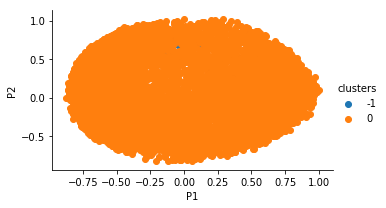

In [0]:
fg = sns.FacetGrid(data=data_principal, hue='clusters', aspect=1.61)
fg.map(plt.scatter, 'P1', 'P2').add_legend()